<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/mlp/mlp_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP on (Fashion) MNIST using TF 2.0

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
try:
    import tensorflow as tf
except ModuleNotFoundError:
    %pip install -qq tensorflow
    import tensorflow as tf
from tensorflow import keras

assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices("GPU"):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

     |████████████████████████████████| 497.6 MB 8.6 kB/s  eta 0:00:012
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-14.0.1-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
     |████████████████████████████████| 2.1 MB 16.4 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=19c5dfa536b959af6d419d7c7e9c0e1e3779279487c931b181d470f2ab6360c8
  Stored in directory

2022-05-14 05:15:42.904069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-14 05:15:42.904090: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


No GPU was detected. DNNs can be very slow without a GPU.


2022-05-14 05:15:44.553337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-14 05:15:44.553363: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-14 05:15:44.553379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anand-HP-Laptop-14s-dq2xxx): /proc/driver/nvidia/version does not exist


In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL

try:
    import imageio
except ModuleNotFoundError:
    %pip install -qq imageio
    import imageio
from IPython import display
import sklearn
from time import time

np.random.seed(0)

try:
    from probml_utils.mnist_helper_tf import *
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils.mnist_helper_tf import *

  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-cc5y8gq7
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-cc5y8gq7
  Resolved https://github.com/probml/probml-utils.git to commit 1cf7cf7b168d8f91e78e20f4464c60e4f693491b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached distrax-0.1.2-py3-none-any.whl (272 kB)
  Using cached TexSoup-0.3.1.tar.gz (26 kB)
  Using cached jax-0.3.10.tar.gz (939 kB)
     |████████████████████████████████| 69.0 MB 88 kB/s  eta 0:00:012     |██████████████████████████████▊ | 66.2 MB 4.4 MB/s eta 0:00:01
  Using cached firebase_admin-5.2.0-py3-none-any.whl (115 kB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached chex-0.1.3-py3-none-any.whl (72 kB)
  Using cached tensorflow_probability-0.16.0-py2.py3-none-any.whl (6.3 MB)
     |████████████████████████████████| 142 kB 11.3 MB/s eta 0

  Created wheel for probml-utils: filename=probml_utils-0.1.dev52+g1cf7cf7-py3-none-any.whl size=32155 sha256=5d6739efadbe5e929020af3aa42e0e774bf19f7ec5e58346c25fd1becb542248
  Stored in directory: /tmp/pip-ephem-wheel-cache-8esvtr17/wheels/20/25/f1/287926200d414dd40122434c898030c9a5e467b9da81948d25
  Created wheel for jax: filename=jax-0.3.10-py3-none-any.whl size=1088067 sha256=a1f76679d8ff60fdd98a6e40c856e4200dd3c78425ebe9b6892106bf8ba88767
  Stored in directory: /home/anand/.cache/pip/wheels/14/4a/ff/e9ddfa09012c67d22f926a7873c546c04e722969e8d86f84ec
  Created wheel for TexSoup: filename=TexSoup-0.3.1-py3-none-any.whl size=27666 sha256=56f50088f7561ea2568919f0d68ded1845686657faaa825dd43b4ba46a21d04a
  Stored in directory: /home/anand/.cache/pip/wheels/7a/1b/4e/376437fded0b1407afc823f0e4d56893dcc449a4ca968da53a
Successfully built probml-utils jax TexSoup
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.46.0
    Uninstalling grpcio-1.46.0:
      Successfully u

(60000, 28, 28)


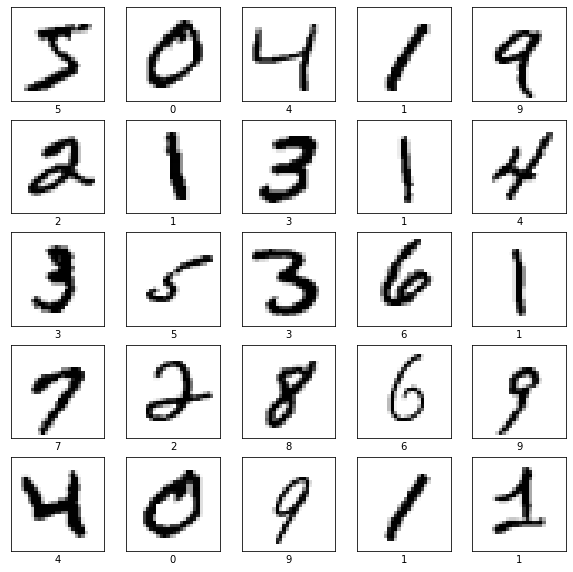

In [3]:
train_images, train_labels, test_images, test_labels, class_names = get_dataset(FASHION=False)
print(train_images.shape)
plot_dataset(train_images, train_labels, class_names)

In [4]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# We just train for 1 epochs because (1) it is faster, and
# (2) it produces more errors, which makes for a more interesting plot :)
time_start = time()
model.fit(train_images, train_labels, epochs=1)
print("time spent training {:0.3f}".format(time() - time_start))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2022-05-14 05:16:43.431578: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-14 05:16:43.653962: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 871us/step - loss: 0.2288 - accuracy: 0.9319
time spent training 2.223


In [5]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy:", train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

  90/1875 [>.............................] - ETA: 1s - loss: 0.0953 - accuracy: 0.9743  

2022-05-14 05:16:45.832119: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 519us/step - loss: 0.1004 - accuracy: 0.9700
Train accuracy: 0.9699666500091553
129/313 [===========>..................] - ETA: 0s - loss: 0.1547 - accuracy: 0.9547

2022-05-14 05:16:46.995403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 791us/step - loss: 0.1162 - accuracy: 0.9646
Test accuracy: 0.9646000266075134


In [6]:
# To apply prediction to a single image, we need to reshape to an (N,D,D) tensor
# where N=1
img = test_images[0]
img = np.expand_dims(img, 0)
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single.shape)

(1, 28, 28)
(1, 10)


(10000, 10)
(354,)


2022-05-14 05:16:47.452415: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


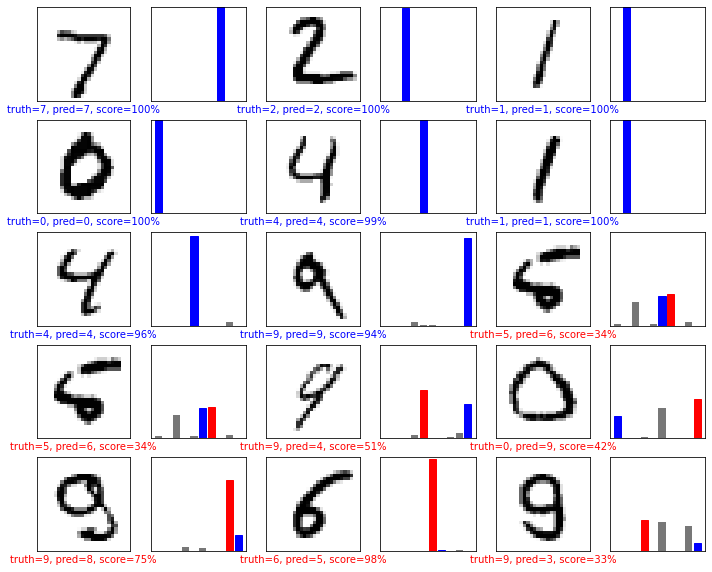

In [7]:
predictions = model.predict(test_images)
print(np.shape(predictions))
ndx = find_interesting_test_images(predictions, test_labels)
plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)

In [8]:
model_epoch = model  # save old model

# Train for 1 more epochs
time_start = time()
model.fit(train_images, train_labels, epochs=1)
print("time spent training {:0.3f}".format(time() - time_start))

 182/1875 [=>............................] - ETA: 1s - loss: 0.0915 - accuracy: 0.9748

2022-05-14 05:16:48.643030: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 861us/step - loss: 0.0948 - accuracy: 0.9711
time spent training 1.875


In [9]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy:", train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

1875/1875 [==============================] - 1s 530us/step - loss: 0.0622 - accuracy: 0.9810
Train accuracy: 0.9809666872024536
313/313 [==============================] - 0s 744us/step - loss: 0.0896 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


(10000, 10)


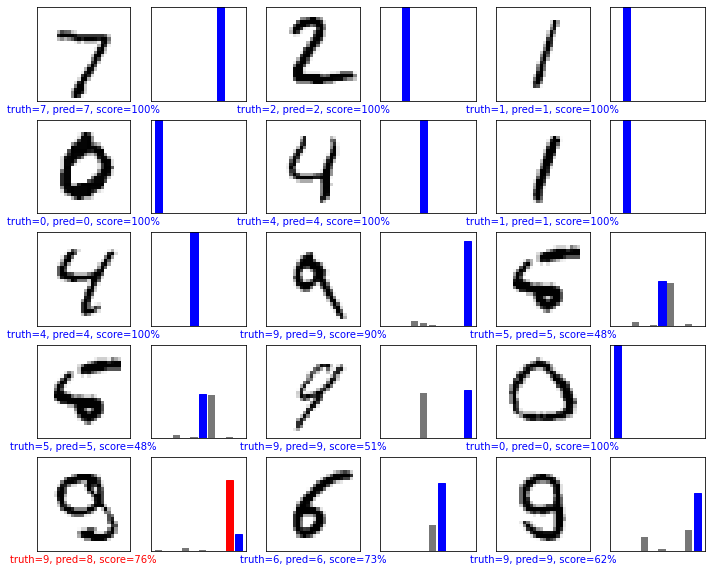

In [11]:
predictions = model.predict(test_images)
print(np.shape(predictions))
# test_ndx = find_interesting_test_images(predictions) # re-use old inddices
plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)